# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [124]:
import pandas as pd
import numpy as np
from scipy import stats
import math

In [125]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [126]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [127]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [128]:
data.shape

(4870, 65)

<div class="span5 alert alert-success">
<p># It is a binary response problem (success,failure) which makes it Bernoulli distribution . However, looking at the shape of the data the distribution will follow a normal distribution of size > 30 so CLT can be applied. Two sample t-test is appropriate.
    
    Our null hypothesis Ho is that the proportion of callbacks for black-sounding names is equal to the proportion of callbacks for white-sounding names.
# 
# Alternate hyothesis Ha: The proportion of callbacks for black-sounding names is not equal to the proportion of callbacks for white-sounding names.</p>
</div>

In [129]:
w = data[data.race=='w']
b = data[data.race=='b']

In [130]:
num_black= len(data[data.race == 'b'])
num_white= len(data[data.race == 'w'])

In [131]:
# number of callbacks for black-sounding names
sum_black=sum(data[data.race=='b'].call)
sum_white=sum(data[data.race=='w'].call)

In [132]:
#proportion of black-sounding called
black_prop= sum_black/num_black
black_prop

0.06447638603696099

In [133]:
#proportion of white-sounding called
white_prop= sum_white/num_white
white_prop

0.09650924024640657

In [134]:
#difference of the proportions
diff_prop=white_prop-black_prop
diff_prop

0.032032854209445585

In [135]:
## percentage callback Black variance
var_black=(black_prop*(1-black_prop)/num_black)
var_black

2.4771737856498466e-05

In [136]:
## percentage callback White variance
var_white=(white_prop*(1-white_prop)/num_white)
var_white

3.580911983304638e-05

In [137]:
## Sampling Distribution variance
var_black_white= var_black + var_white
var_black_white

6.058085768954485e-05

In [138]:
std_black_white=np.sqrt(var_black_white)
std_black_white

0.0077833705866767544

In [139]:
abs(black_prop-white_prop)

0.032032854209445585

In [140]:
#Compute margin of error, confidence interval, and p-value.
## Using 95% Confidence level that (black_prop-white_prop) is within d of 0.032
#margin of error
mean_of_error=1.96*std_black_white
mean_of_error

0.015255406349886438

In [141]:
min_black_white_prop=abs(diff_prop)-mean_of_error
min_black_white_prop

0.016777447859559147

In [142]:
max_black_white_prop=abs(diff_prop)+mean_of_error
max_black_white_prop


0.047288260559332024

In [143]:
## confidence interval(ci)
ci = abs(diff_prop) + np.array([-1, 1]) * mean_of_error
ci

array([0.01677745, 0.04728826])

In [144]:
## Standard Error 
SE=std_black_white
SE

0.0077833705866767544

In [145]:
## degrees of freedom(df)
black=var_black/num_black
white=var_white/num_black
df=((black+white)**2)/(((black**2)/num_black)+((white**2)/num_white))
df

4713.53819343226

In [146]:
#the z_score
t_val=(diff_prop-0)/SE
t_val

4.11555043573

In [147]:
#calculate p-value
p_value = stats.t.sf(np.abs(t_val),df)*2  
p_value

3.9285451158654165e-05

In [148]:
bb=data[data.race=='b'].call
ww=data[data.race=='w'].call

In [149]:
stats.ttest_ind(bb,ww,equal_var=False)

Ttest_indResult(statistic=-4.114705290861751, pvalue=3.942941513645935e-05)

In [150]:
#standard deviation of black prop
std_black=np.sqrt(var_black)
std_black

0.004977121442811946

In [151]:
#standard deviation of white prop
std_white=np.sqrt(var_white)
std_white

0.005984072178128066

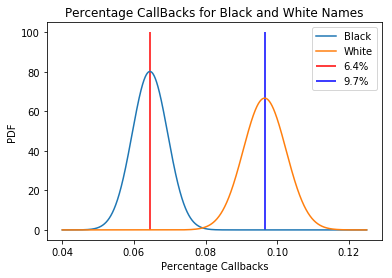

In [121]:
##Normal Distribution graph for Black and White prop Call backs
import pylab
x = np.linspace(0.04,0.125,4870)
y1 = stats.norm.pdf(x, loc=black_prop, scale=std_black)    
pylab.plot(x,y1)
y2 = stats.norm.pdf(x, loc=white_prop, scale=std_white)    
pylab.plot(x,y2)
pylab.xlabel('Percentage Callbacks')
pylab.ylabel('PDF')
pylab.vlines(black_prop,0, 100, color='red')
pylab.vlines(white_prop,0,100, color='blue')
pylab.legend(['B', 'W', '6.4%', '9.7%'])
pylab.title('Percentage CallBacks for Black and White Names')
pylab.show()

<div class="span5 alert alert-success">
<p> Ho will be rejected and H1 will be accepted and we can say that there is significance difference between black and white name sounding resumes looking at percentage callbacks.Since the value of z is greater than the critical values of 1.96 at 5% significance level, we can say that this value of 4.115 is even less probable than 1.96.    
    The analysis shows that race/name is a factor that affect callback success. Last but not least,correlation between  features other than race/name and callback success must be analyzed and ranked to test which feature is most important in callback success.
</p>
</div>

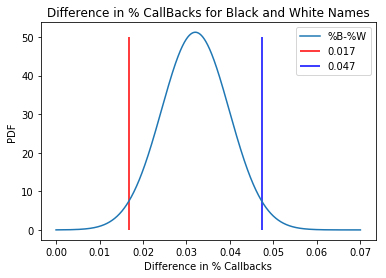

In [123]:
## Normal Distribution of difference in percentage of Black and White Callbacks
x = np.linspace(0,0.07,4870)
y1 = stats.norm.pdf(x, loc=abs(black_prop-white_prop), scale=std_black_white)    
pylab.plot(x,y1)
pylab.xlabel('Difference in % Callbacks')
pylab.ylabel('PDF')
pylab.vlines(min_black_white_prop,0, 50, color='red')
pylab.vlines(max_black_white_prop,0,50, color='blue')
pylab.legend(['%B-%W', '0.017', '0.047'])
pylab.title('Difference in % CallBacks for Black and White Names')
pylab.show()